## Онтологическое моделирование. Социальная сеть

Теоретический материал по построению онтологии представлен в ноутбуке в папке Task_9. Into/Example ontology.ipynb


Создадим онтологию для социальной сети. 

Представим, что мы постепенно собираем данные с некоторой социальной сети и добавляем их в онтологию. После каждого изменения, мы обязательно проверяем, что все работает.

Вам не нужно собирать данные, все данные есть в папке Task_9. Onto/data:

- users.csv: пользователи соцсети.
- posts.csv: посты (контент) с заголовками.
- categories.csv: тематические классы (Fact, Opinion, FakeNews, Meme и т.д.).
- publishes.csv: кто опубликовал какой пост.


Пример онтологии: ИИ в социальных сетях

🧱 Классы:
- User — пользователь соцсети.
- Post — публикация.
- Category — базовая категория контента.
- FakeNews, Opinion, Fact, Meme, Educational — подклассы категорий.

🔗 Свойства:
- has_published(User → Post)
- has_title(Post)
- has_category(Post → Category)

🧍 Примеры пользователей:
- alice публикует clickbait_ai_news и openai_announces_gpt5
- bob публикует ai_is_dangerous, funny_ai_cat, how_neural_networks_work

📌 Категории контента:
- clickbait_ai_news — FakeNews
- ai_is_dangerous — Opinion
- openai_announces_gpt5 — Fact
- funny_ai_cat — Meme



In [1]:
# Установка необходимых библиотек
!pip install --no-cache-dir owlready2 rdflib SPARQLWrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 54.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 532.6 MB/s eta 0:00:00
  Created wheel for owlready2: filename=owlready2-0.47-cp312-cp312-linux_x86_64.whl size=23854739 sha256=efec19d99385038c239e594cdddb8ea54876912f1316f74d4108a314471352eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-42fdcr5y/wheels/a8/81/8a/f76909ab0a8a17ce3735a6b9501344c545be5098d54b66adfc
Successfully built owlready2

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from owlready2 import *
import pandas as pd


# Загружаем данные из CSV файлов
users_df = pd.read_csv("Task_9.Onto/data/users.csv")
posts_df = pd.read_csv("Task_9.Onto/data/posts.csv")
categories_df = pd.read_csv("Task_9.Onto/data/categories.csv")
publishes_df = pd.read_csv("Task_9.Onto/data/publishes.csv")


In [3]:
users_df.head()

,id,name
0,u1,Алексей
1,u2,Мария
2,u3,Иван
3,u4,Екатерина
4,u5,Николай


In [4]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     object
 1   title   11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


# Итерация 1

## Задание 1: Создайте онтологию для двух классов

Для создания концептов используйте файлы: 
- posts.csv (содержит: id, title) -> класс Post
- users.csv (содержит: id, name) -> класс User

Для создания отношений используйте файл publishers.csv (содержит: user_id, post_id — кто опубликовал пост):
- объектное свойство "опубликовал" (has_published) между User и Post
- для Post свойство-значение "имеет заголовок" (has_title) строкового типа
- для User свойство-значение "имеет имя" (has_name) строкового типа

In [5]:
onto = get_ontology("http://example.org/social_ai.owl")

In [6]:
with onto:
    class User(Thing): pass
    class Post(Thing): pass

    class has_name(User >> str, DataProperty): pass
    class has_title(Post >> str, DataProperty): pass

    class has_published(User >> Post, ObjectProperty): pass

In [7]:
user_dict = {}
for _, row in users_df.iterrows():
    user_instance = onto.User(row['id'])
    user_instance.has_name = [row['name']]
    user_dict[row['id']] = user_instance

In [8]:
post_dict = {}
for _, row in posts_df.iterrows():
    post_instance = onto.Post(row["id"])
    post_instance.has_title = [row["title"]]
    post_dict[row["id"]] = post_instance

In [9]:
for _, row in publishes_df.iterrows():
    user_id = row["user_id"]
    post_id = row["post_id"]
    if user_id in user_dict and post_id in post_dict:
        user_dict[user_id].has_published.append(post_dict[post_id])

In [10]:
onto.save(file="social_ai.owl", format="rdfxml")

In [11]:
# Проверим пример
for u in onto.User.instances():
    print(f"{u.name}: {u.has_name}, публикует {[p.has_title for p in u.has_published]}")

u1: ['Алексей'], публикует [['Новый ИИ от OpenAI способен писать музыку']]
u2: ['Мария'], публикует [['Илон Маск планирует имплантировать чипы в мозг']]
u3: ['Иван'], публикует [['Почему стоит опасаться глубоких фейков']]
u4: ['Екатерина'], публикует [['ИИ ошибся и выдал фейковую новость']]
u5: ['Николай'], публикует [['ИИ улучшает качество фото с низким разрешением']]
u6: ['Ольга'], публикует [['Советы по защите личных данных в соцсетях']]
u7: ['Дмитрий'], публикует [['Мнение: будущее за гибридным интеллектом']]
u8: ['Анастасия'], публикует [['Факт: ИИ уже используется в медицинской диагностике']]
u9: ['Сергей'], публикует [['Ироничный мем про ИИ и роботов']]
u10: ['Елена'], публикует [['Новости: ИИ победил чемпиона по го']]
u11: ['Роман'], публикует [['Мнение: роботы не заменят людей']]


## Задание 2: Создайте экземпляры пользователей
Создайте всех пользователей на основе User из набора данных users_df.

Передайте доступные свойства для экземпляров. 

In [12]:
# здесь ваш код

## Задание 3: Создайте экземпляры постов
Создайте все посты на основе Post из набора данных posts_df.

Передайте доступные свойства для экземпляров. 

In [13]:
# здесь ваш код

## Задание 4: Создайте связи с помощью отношения  has_published между пользователями и постами

In [14]:
# здесь ваш код

## Задание 5: Проверка онтологии

Проверьте все ли работает. Выведите для каждого пользователя название опубликованного  им поста. 

In [15]:
# здесь ваш код


# Итерация 2

## Задание 6: Добавьте новый концепт в существующую онтологию

Добавьте класс Category в уже существующую онтологию

In [16]:
with onto:
    class Category(Thing): pass

## Задание 7: Добавьте свойства и связи

После добавления класса Category добавьте объектное свойство has_category для связи постов с категориями.

In [17]:
with onto:
    class has_category(Post >> Category, ObjectProperty): pass

## Задание 8: Создайте экземпляры категорий 

Создайте экземпляяры категорий и реализуйте связь между постами и категориями

In [18]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post_id   11 non-null     object
 1   category  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [19]:
category_dict = {}
for _, row in categories_df.iterrows():
    post_id = row['post_id']
    category_name = row['category']
    if category_name not in category_dict:
        category_instance = onto.Category(category_name)
        category_dict[category_name] = category_instance
    else:
        category_instance = category_dict[category_name]
        
    if post_id in post_dict:
        post_dict[post_id].has_category.append(category_instance)

## Задание 9: Проверка онтологии

Проверьте все ли работает. Выведите для каждого пользователя название опубликованного  им поста с указанием к какой катеригории этот пост относится.
Примечание. Для каждого поста должна быть выведена только одна категория, без повторов

In [20]:
for u in onto.User.instances():
    user_name = u.has_name[0]

    for post in u.has_published:
        post_title = post.has_title[0]
        categories = list(post.has_category)
        category_names = [i.name for i in categories]
        print(f'{user_name} публикует пост "{post_title}" (Категория: {category_names})')


Алексей публикует пост "Новый ИИ от OpenAI способен писать музыку" (Категория: ['Fact'])
Мария публикует пост "Илон Маск планирует имплантировать чипы в мозг" (Категория: ['Fact'])
Иван публикует пост "Почему стоит опасаться глубоких фейков" (Категория: ['Opinion'])
Екатерина публикует пост "ИИ ошибся и выдал фейковую новость" (Категория: ['FakeNews'])
Николай публикует пост "ИИ улучшает качество фото с низким разрешением" (Категория: ['Fact'])
Ольга публикует пост "Советы по защите личных данных в соцсетях" (Категория: ['Opinion'])
Дмитрий публикует пост "Мнение: будущее за гибридным интеллектом" (Категория: ['Opinion'])
Анастасия публикует пост "Факт: ИИ уже используется в медицинской диагностике" (Категория: ['Fact'])
Сергей публикует пост "Ироничный мем про ИИ и роботов" (Категория: ['Meme'])
Елена публикует пост "Новости: ИИ победил чемпиона по го" (Категория: ['Fact'])
Роман публикует пост "Мнение: роботы не заменят людей" (Категория: ['Opinion'])


## Задание 10: Создание аксиомы

Для данной онтологии, которая представляет посты пользователей в социальных сетях, можно добавить аксиому, которая будет утверждать, что <b>"Каждый пост, опубликованный пользователем, имеет хотя бы одну категорию"</b>. Это гарантирует, что все посты будут связаны с какой-то категорией.

Чтобы выразить это в OWL-формате, можно создать аксиому, которая будет связывать посты с категорией через свойство has_category. Также необходимо избегать повторов. 

In [21]:
with onto:
    class Axiom(onto.Post):
        equivalent_to = [onto.Post & onto.has_category.some(onto.Category)]

posts_with_category = set()
for post in onto.Post.instances():
    if len(post.has_category) > 0:
        posts_with_category.add(post.has_title[0])

print("\nPosts with Category (inferred manually):")
print("\n".join(posts_with_category))


Posts with Category (inferred manually):
Мнение: роботы не заменят людей
Ироничный мем про ИИ и роботов
Новый ИИ от OpenAI способен писать музыку
ИИ ошибся и выдал фейковую новость
Почему стоит опасаться глубоких фейков
Факт: ИИ уже используется в медицинской диагностике
Советы по защите личных данных в соцсетях
Новости: ИИ победил чемпиона по го
Мнение: будущее за гибридным интеллектом
ИИ улучшает качество фото с низким разрешением
Илон Маск планирует имплантировать чипы в мозг


## Задание 11: Проверка онтологии

Проверьте, что аксиома работает -> для каждого поста проверяется, что он имеет категорию и выводится название самой категории. 

In [22]:
# здесь ваш код

# Итерация 3

## Задание 12: Создание подкласса для FakeNews

Создайте потомка FakeNewsPost для класса Post

In [23]:
with onto:
    class FakeNewsPost(onto.Post): pass

## Задание 13: Применение подкласса к постам с категорией 'FakeNews'

Если категория поста - 'FakeNews', то сделайте его экземпляром FakeNewsPost

In [24]:
for post in onto.Post.instances():
    if any(category.name == 'FakeNews' for category in post.has_category):
        post.is_a.append(onto.FakeNewsPost)

## Задание 14: Проверка онтологии

Выполните проверку -  есть ли посты типа FakeNewsPost, если есть, то выведите их названия (title)


In [25]:
fake_news_posts = [post.has_title[0] for post in onto.FakeNewsPost.instances()]
for title in fake_news_posts:
    print(title)

ИИ ошибся и выдал фейковую новость


# Итерация 4

## Задание 15: Инверсивное отношение

Создайте инверсивное объектное отношение  "имеет авторство" has_author для Post и User  отношению has_published.

Примечание. Для указания, что отношение инверсивное другому отношению используйте свойство inverse_property. 

Например, 

```
with onto:
   class has_child(ObjectProperty):
        domain = [Parent]
        range = [Children]
        inverse_property = has_parent
```

In [26]:
with onto:
    class has_author(ObjectProperty):
        domain = [onto.Post]
        range = [onto.User]
        inverse_property = onto.has_published

In [27]:
for post in onto.Post.instances():
    authors = [author.has_name[0] for author in post.has_author]
    print(f'Пост {post.has_title[0]} написан пользователем: {authors}')

Пост Новый ИИ от OpenAI способен писать музыку написан пользователем: ['Алексей']
Пост Илон Маск планирует имплантировать чипы в мозг написан пользователем: ['Мария']
Пост Почему стоит опасаться глубоких фейков написан пользователем: ['Иван']
Пост ИИ ошибся и выдал фейковую новость написан пользователем: ['Екатерина']
Пост ИИ улучшает качество фото с низким разрешением написан пользователем: ['Николай']
Пост Советы по защите личных данных в соцсетях написан пользователем: ['Ольга']
Пост Мнение: будущее за гибридным интеллектом написан пользователем: ['Дмитрий']
Пост Факт: ИИ уже используется в медицинской диагностике написан пользователем: ['Анастасия']
Пост Ироничный мем про ИИ и роботов написан пользователем: ['Сергей']
Пост Новости: ИИ победил чемпиона по го написан пользователем: ['Елена']
Пост Мнение: роботы не заменят людей написан пользователем: ['Роман']


 ## Задание 15: Cоздайте концепт LegalCase - Судебное разбирательство

 Мы хотим выявить всех, кто "строчит" фейки.
 В онтологии это можно выразить с помощью правила, связывающего факт публикации фейковой новости с последствием — судебным разбирательством. 

 Создайте класс LegalCase.

In [28]:
with onto:
    class LegalCase(Thing): pass

 ## Задание 16: Добавим объектное свойство involved_in_case

 Добавим объектное свойство involved_in_case между классами User и LegalCase.


In [43]:
with onto:
    class involved_in_case(User >> LegalCase, ObjectProperty): pass

In [44]:
with onto:
    rule = Imp("FakeNewsLegalImp", namespace=onto)
    rule.set_as_rule("""
        User(?u), Post(?p), has_author(?p, ?u), has_category(?p, FakeNews) 
        -> involved_in_case(?u, ?case), LegalCase(?case)
    """)

Примечание. Добавим правило: 

`если User публикует NewsPost с категорией FakeNews, то он участвует в LegalCase`

Чтобы указать такое правило можно использовать синтаксис SWRL правил через Imp:

```
with onto:
    rule = Imp("FakeNewsLegalImp", namespace=onto)
    rule.set_as_rule("""
        User(?u), Post(?p), hasAuthor(?p, ?u), has_category(?p, FakeNews) 
        -> involved_in_case(?u, ?case), LegalCase(?case)
    """)

```

Данное правило мы можем загрузить, однако нам необходим ризонер, который позволяет выявлять на основе заданных правил новые знания. К примеру, если пользователь опубликовал пост с категорией FakeNews, то он автоматически (при инференции) будет связан с новым инстансом LegalCase.

Правило SWRL, которое задано выше, не будет автоматически "выполняться" или выводить результаты в owlready2. Это связано с тем, что owlready2 не имеет встроенного механизма выполнения (reasoning) SWRL-правил — только их хранение и сериализация в OWL.

Чтобы правило дало видимый результат, нужно запустить ризонер, но в Simba его установить не получится (проблема с Java). 

Поэтому нужно "сэмулировать" выполнение SWRL-правил вручную в Python. 

## Задание 17: Реализуйте в ручную применение вышеописанной SWRL-логики

Реализуйте проверку для всех пользователей:

если User публикует NewsPost с категорией FakeNews, то он участвует в LegalCase (судебном разбирательстве).

In [48]:
onto.User.instances()[3].has_name

['Екатерина']

In [49]:
onto.User.instances()[0].has_name

['Алексей']

In [45]:
# здесь ваш код
for user in onto.User.instances():
    for post in user.has_published:
        if any(category.name == 'FakeNews' for category in post.has_category):
            case = onto.LegalCase(f'FakeNewsCase_{user.name}')
            user.involved_in_case.append(case)
            print(case)

social_ai.FakeNewsCase_u1
social_ai.FakeNewsCase_u4


## Задание 18: Сохраните полученную онтологию 

 Сохраните полученную онтологию, используя метод save(). Пример, 

```
 onto.save(file="onlogy.owl", format="rdfxml")

```

Откройте файл с онтологией, изучите вид представления данных.


In [32]:
onto.save(file="onlogy.owl", format="rdfxml")

## Задание 19: Отнологический граф

Постройте онтологический граф для полученной онтологии. 
Важно, чтобы полученный граф был читаемый!

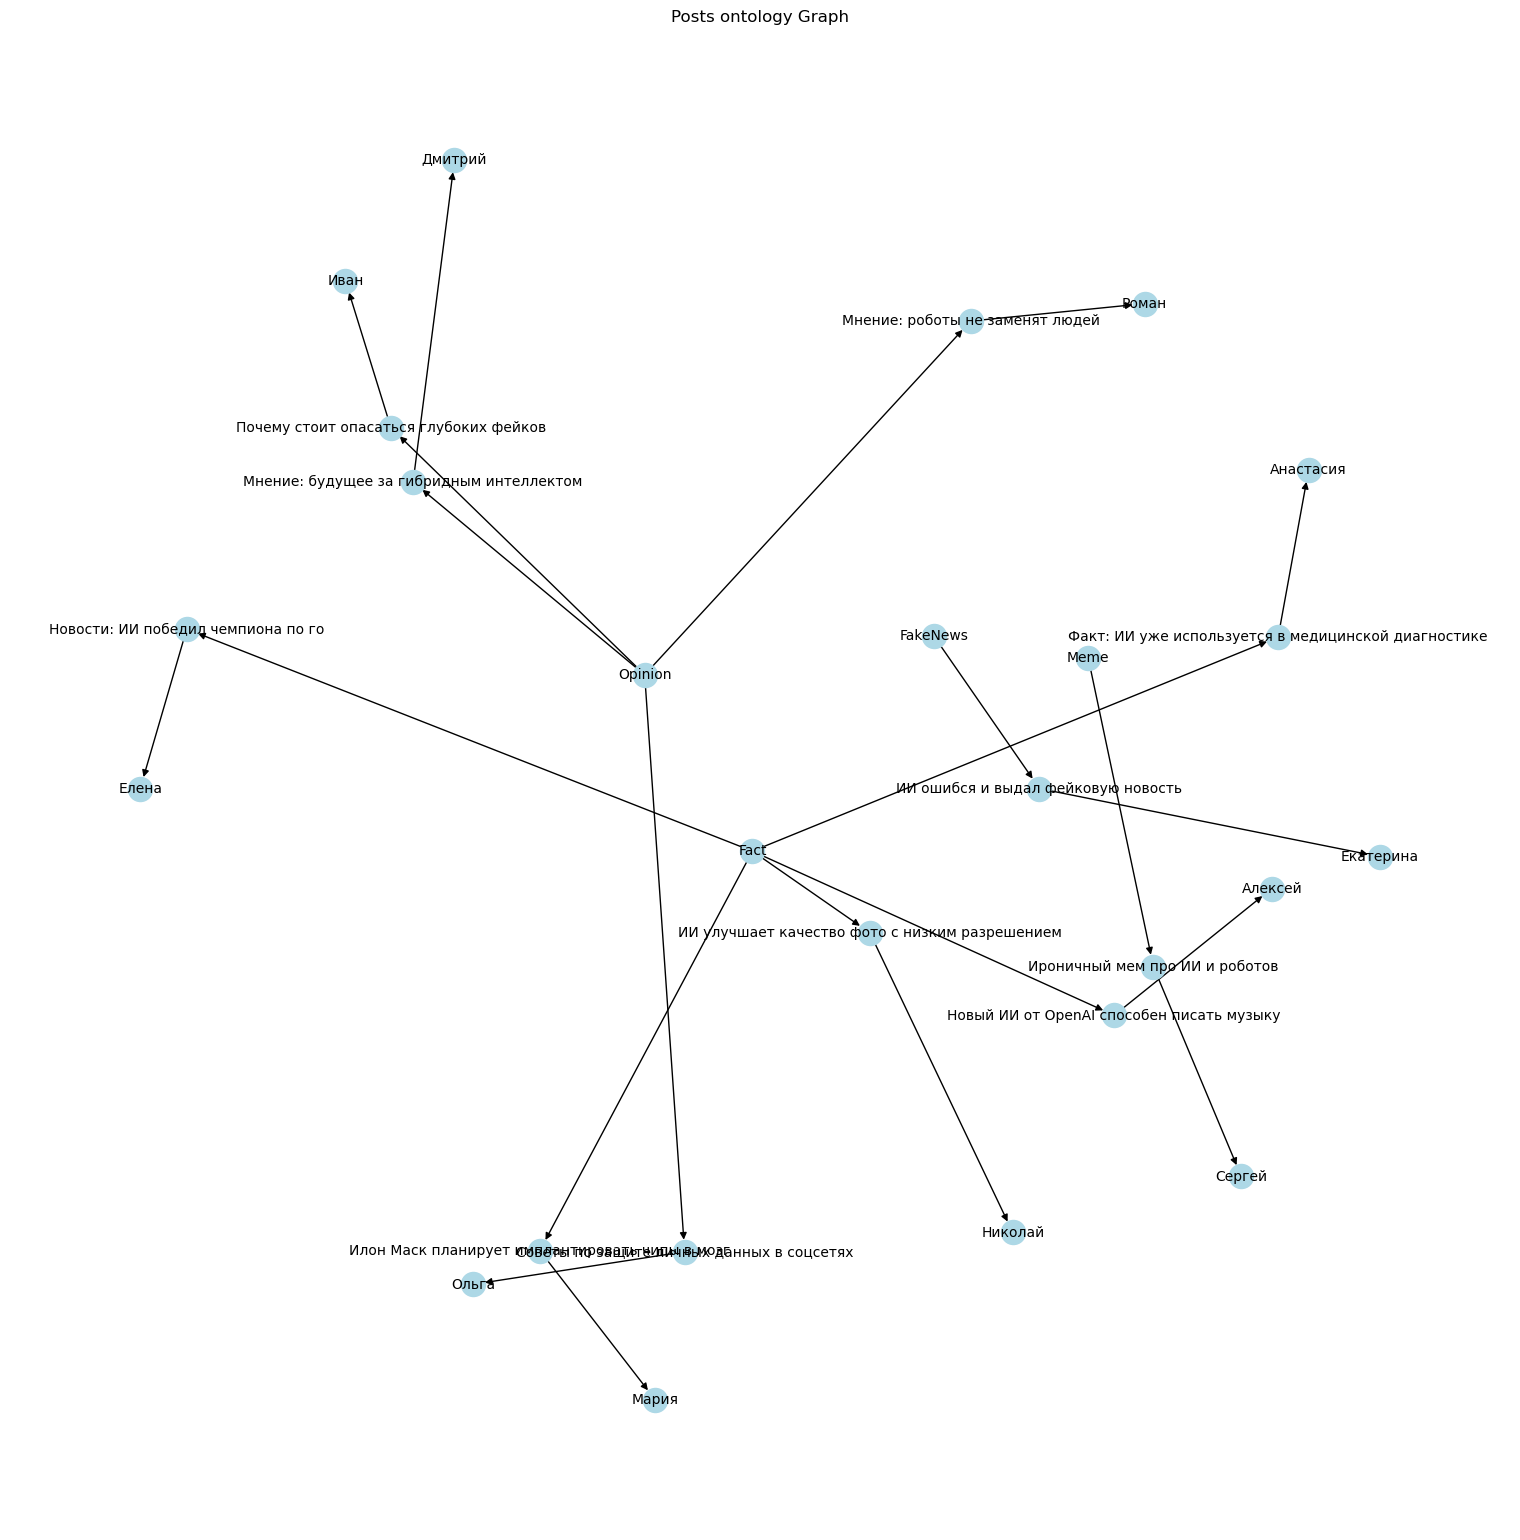

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаём граф
G = nx.DiGraph()

for post in onto.Post.instances():
    category_name = post.has_category[0].name
    post_title = post.has_title[0]

    if not G.has_node(category_name):
        G.add_node(category_name, type='category')

    G.add_edge(category_name, post_title, type='category_to_post')

    for author in post.has_author:
        author_name = author.has_name[0]
        G.add_edge(post_title, author_name, type='author_to_post')
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightblue', font_size=10)
plt.title("Posts ontology Graph")
plt.show()

##  Задание 20: Итерация 5

Добавьте новую итерацию для полученной онтологии. В ней можно добавить новые классы, отношения, правила и т.д. 

Проверьте онтологию с новыми изменениями. 


In [35]:
posts_df.head()

,id,title
0,p1,Новый ИИ от OpenAI способен писать музыку
1,p2,Илон Маск планирует имплантировать чипы в мозг
2,p3,Почему стоит опасаться глубоких фейков
3,p4,ИИ ошибся и выдал фейковую новость
4,p5,ИИ улучшает качество фото с низким разрешением


In [36]:
category_dict

{'Fact': social_ai.Fact,
 'Opinion': social_ai.Opinion,
 'FakeNews': social_ai.FakeNews,
 'Meme': social_ai.Meme}

In [37]:
post_dict['p1'].has_category.append(category_dict['FakeNews'])

In [42]:
for post in onto.Post.instances():
    print(post.has_title, post.has_category)

['Новый ИИ от OpenAI способен писать музыку'] [social_ai.Fact, social_ai.FakeNews]
['Илон Маск планирует имплантировать чипы в мозг'] [social_ai.Fact]
['Почему стоит опасаться глубоких фейков'] [social_ai.Opinion]
['ИИ ошибся и выдал фейковую новость'] [social_ai.FakeNews]
['ИИ улучшает качество фото с низким разрешением'] [social_ai.Fact]
['Советы по защите личных данных в соцсетях'] [social_ai.Opinion]
['Мнение: будущее за гибридным интеллектом'] [social_ai.Opinion]
['Факт: ИИ уже используется в медицинской диагностике'] [social_ai.Fact]
['Ироничный мем про ИИ и роботов'] [social_ai.Meme]
['Новости: ИИ победил чемпиона по го'] [social_ai.Fact]
['Мнение: роботы не заменят людей'] [social_ai.Opinion]


In [ ]:
category_dict = {}
for _, row in categories_df.iterrows():
    post_id = row['post_id']
    category_name = row['category']
    if category_name not in category_dict:
        category_instance = onto.Category(category_name)
        category_dict[category_name] = category_instance
    else:
        category_instance = category_dict[category_name]
        
    if post_id in post_dict:
        post_dict[post_id].has_category.append(category_instance)